Training data shape: (931559, 10, 16)
Validation data shape: (199621, 10, 16)
Test data shape: (199620, 10, 16)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,185 (129.63 KB)

 Trainable params: 33,185 (129.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
14554/14556 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1175.6074

14556/14556 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - loss: 1175.4716 - val_loss: 6.7951 - learning_rate: 3.0000e-04
Epoch 2/100
14554/14556 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.8725

14556/14556 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - loss: 55.8719 - val_loss: 5.2785 - learning_rate: 3.0000e-04
Epoch 3/100
14553/14556 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.5993

14556/14556 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - loss: 47.5990 - val_loss: 4.7853 - learning_rate: 3.0000e-04
Epoch 4/100
14545/14556 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.5774

14556/14556 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - loss: 43.5768 - val_loss: 3.0049 - learning_rate: 3.0000e-04
Epoch 5/100
14553/14556 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.4304

14556/14556 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - loss: 40.4302 - val_loss: 2.3452 - learning_rate: 3.0000e-04
Epoch 6/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - loss: 37.4597 - val_loss: 2.5033 - learning_rate: 3.0000e-04
Epoch 7/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - loss: 34.7175 - val_loss: 4.9158 - learning_rate: 3.0000e-04
Epoch 8/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - loss: 32.3225 - val_loss: 3.5405 - learning_rate: 3.0000e-04
Epoch 9/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - loss: 30.3356 - val_loss: 4.1752 - learning_rate: 3.0000e-04
Epoch 10/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - loss: 27.1473 - val_loss: 7.9551 - learning_rate: 1.5000e-04
Epoch 11/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - loss: 25.5468 - val_loss: 9.2530 - learning_rate: 1.5000e-04
Epoch 12/100
14556/14556 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - loss: 24.2437 - val_loss: 11.4974 - learning_rate: 1.5000e-04
Epoch 13/100
14556/14556 ━━━━━━━━━━━━━━━

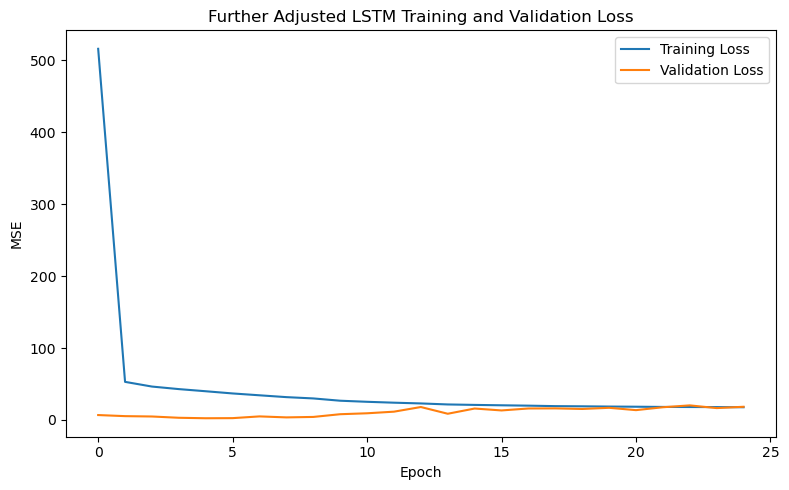

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


df = pd.read_csv("processed_data.csv")

# Separate features and target variable
target_col = "motor_temperature"
feature_cols = [col for col in df.columns if col != target_col]
X = df[feature_cols].values
y = df[target_col].values

# Create Time-Series Sequences
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(window_size, len(X)):
        X_seq.append(X[i - window_size:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

window_size = 10  
X_seq, y_seq = create_sequences(X, y, window_size)



# Spliting Data Chronologically
n = len(X_seq)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

X_train_seq = X_seq[:train_end]
y_train_seq = y_seq[:train_end]

X_val_seq = X_seq[train_end:val_end]
y_val_seq = y_seq[train_end:val_end]

X_test_seq = X_seq[val_end:]
y_test_seq = y_seq[val_end:]

print("Training data shape:", X_train_seq.shape)
print("Validation data shape:", X_val_seq.shape)
print("Test data shape:", X_test_seq.shape)



# LSTM Model

model = Sequential()

# First LSTM layer 64 units with lower L2 and dropout
model.add(LSTM(64, return_sequences=True, 
               input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
               kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.3))

# Second LSTM layer 32 units with lower L2
model.add(LSTM(32, return_sequences=False, 
               kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.3))

model.add(Dense(1))

# Lower initial learning rate 
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mse')

model.summary()



early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,  
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

# Evaluate the Model on the Test Set
test_loss = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print("Test Loss (MSE):", test_loss)


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Further Adjusted LSTM Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.show()


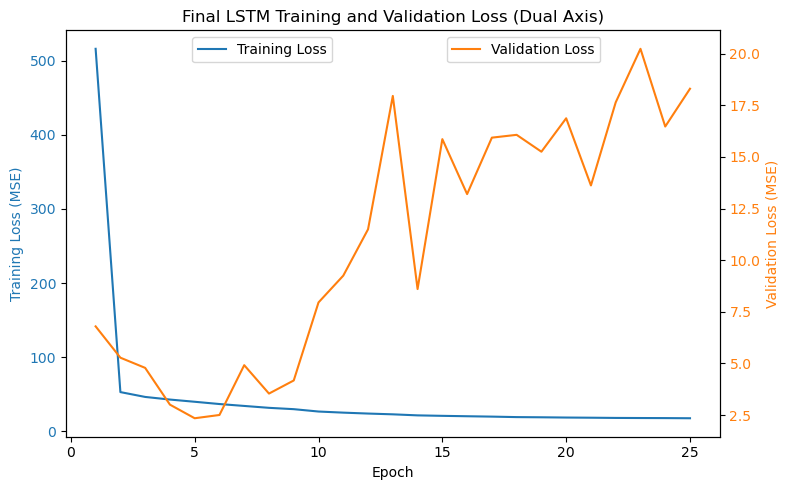

In [2]:
import matplotlib.pyplot as plt

def plot_dual_axis_loss(history):

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_loss) + 1)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    color1 = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Training Loss (MSE)', color=color1)
    ax1.plot(epochs, train_loss, label='Training Loss', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)


    ax2 = ax1.twinx()
    color2 = 'tab:orange'
    ax2.set_ylabel('Validation Loss (MSE)', color=color2)
    ax2.plot(epochs, val_loss, label='Validation Loss', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    ax1.legend(loc='upper center', bbox_to_anchor=(0.3, 1.0))
    ax2.legend(loc='upper center', bbox_to_anchor=(0.7, 1.0))

    plt.title("Final LSTM Training and Validation Loss (Dual Axis)")
    plt.tight_layout()
    plt.show()

plot_dual_axis_loss(history)